# Prediction using Supervised ML
This task is based on Simple Linear Regresion because there are only two variables X (hours) and Y (Scores). The task is to predict the percentage of an student based on the no. of study hours and also in particular to predict score if a student studies for 9.25 hrs/ day.

Author: Abhinav Bahuguna         

The Spark Foundation task-1

In [81]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [82]:
#Importing the data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
                                                                                                                            

Data imported successfully


In [83]:
data.head()   # It gives few rows of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [84]:
#Missing values Identification
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [85]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

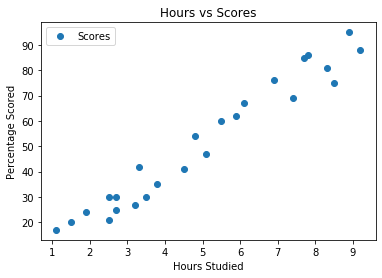

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [86]:
data.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Hours vs Scores')                                                                                                                                                                                                                                                                                                                                                                   
plt.show()
data.corr()

The above Scatter plot and the value of correlation show that there is positive relationship between two variables which means when students increase their hours of study, their percentage of scores also increases.

# Model Building: Training the data

In [87]:
# Now the step is to split the data into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=10)

In [88]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")


Training complete.


# Linear Regression Plot

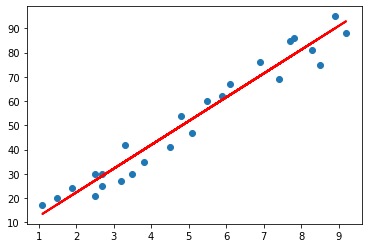

In [89]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, Y)
plt.plot(X, line, Color='red', linewidth=2);
plt.show()

In [90]:
# Comparing Actual vs Predicted
Y_pred = regressor.predict(X_test) # Predicting the scores
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 


,Actual,Predicted
0,20,17.371423
1,47,52.702923
2,42,35.037173
3,27,34.055743
4,41,46.814340


# How accurate is this model?

In [91]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 5.632881746692995


As a statistician point of view, we are making prediction based on some input data. Hence the above less value of mean absolute error shows that there are less chance of error in our forecasting.

# Prediction of Score if a student study for 9.25 hrs/ day

In [92]:
# You can also test with your own data
hours=[[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.43229053722452


The above value of predicted score shows that if a student study for 9.25 hrs/ day, there is a chance of scoring 93.69 (out of 100) marks. 